In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
x , y = make_moons(n_samples= 100 , noise  = 0.15)

In [5]:
x.shape , y.shape

((100, 2), (100,))

In [6]:
y[2]

np.int64(1)

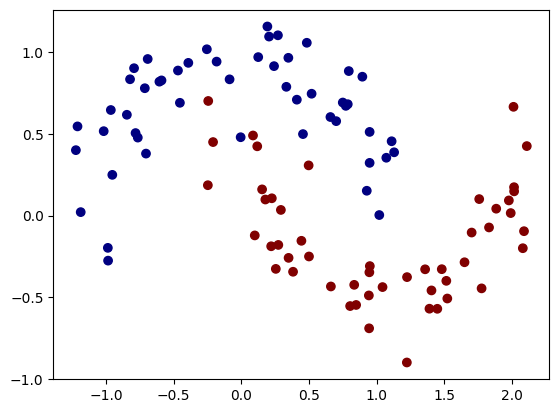

In [7]:
plt.scatter(x[: , 0] , x[: , 1] , c=y , cmap='jet')
plt.show()


In [8]:
polynomial_svm_clf = Pipeline([
    ("polynomial_features" , PolynomialFeatures(degree = 3)),
    ("Scaling" , StandardScaler()),
    ("svm_clf" , LinearSVC())
    
])

In [9]:
polynomial_svm_clf.fit(x , y)

,steps,"[('polynomial_features', ...), ('Scaling', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [10]:
x1_new = np.linspace(-1 , 1 , 100)
x2_new = np.linspace(-1 , 2.5 , 100)

#grid build 

x1_new_grid , x2_new_grid = np.meshgrid(x1_new , x2_new)

#now we must flattern our grid matrix and then combine it with same x2 point which will give (x1 , x2) just like our dataset
 
final_points = np.c_[x1_new_grid.ravel() , x2_new_grid.ravel()]


In [11]:
#now lets make predictions 

y_pred = polynomial_svm_clf.predict(final_points)   

#reshape to grid for contour 

y_pred_grid = y_pred.reshape(x1_new_grid.shape)

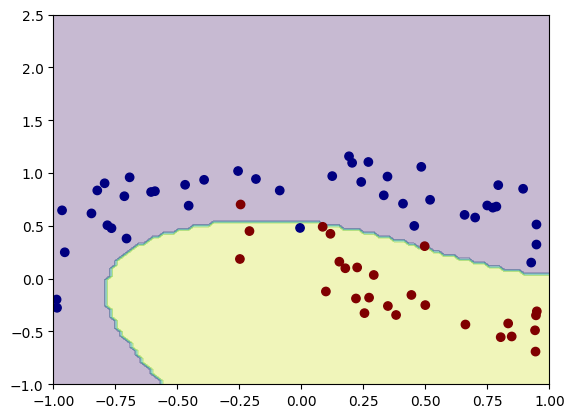

In [12]:
plt.contourf(x1_new_grid , x2_new_grid , y_pred_grid , alpha=0.3) 
plt.scatter(x[: , 0] , x[: , 1] , c=y , cmap='jet')
plt.axis([-1 , 1 , -1 , 2.5])
plt.show()

In [13]:
final_points[2]

array([-0.95959596, -1.        ])

In [14]:
x[0]

array([ 0.34896077, -0.25879144])

In [15]:
#damm i actually did something

In [16]:
#polynomial kernel trick where we dont have to create hella new features so it saves computaion 

In [17]:
# it does same work as if we were to create polynomial features but it does not create new features hence saves from the computaion 

In [19]:
from sklearn.svm import SVC

In [51]:
poly_kernle_svm_clf = Pipeline([
    ("scaler" , StandardScaler()),
    ("svm_clf" , SVC(kernel = "poly" , degree = 10 , coef0= 1 , C= 5))
])

In [52]:
poly_kernle_svm_clf.fit(x,y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,10
,gamma,'scale'


In [43]:
#ima create a function for contour plot 

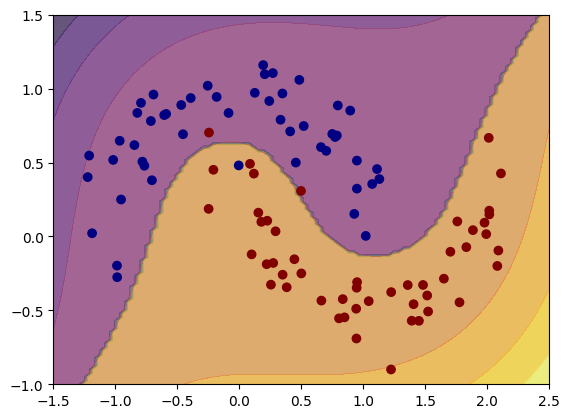

In [44]:
def contour_plot(poly_kernle_svm_clf, axes):
    x1 = np.linspace(axes[0] , axes[1] , 100)
    x2 = np.linspace(axes[2] , axes[3] , 100)
    x1_meshgrid , x2_meshgrid = np.meshgrid(x1 , x2)
    x_final_points = np.c_[x1_meshgrid.ravel() , x2_meshgrid.ravel()]
    y_pred = poly_kernle_svm_clf.predict(x_final_points).reshape(x1_meshgrid.shape)
    decision_boundary = poly_kernle_svm_clf.decision_function(x_final_points).reshape(x1_meshgrid.shape)
    plt.contourf(x1_meshgrid , x2_meshgrid , y_pred , alpha = 0.5)
    plt.contourf(x1_meshgrid , x2_meshgrid , decision_boundary , cmap = "inferno" , alpha = 0.4)
    
    
def plot_points(x , y , axes):
    x1 , x2  = x[: , 0] , x[: , 1]
    plt.scatter(x1 , x2 , c=y , cmap="jet")
    plt.axis(axes)
    
    

contour_plot(poly_kernle_svm_clf , [-1.5 , 2.5 , -1 , 1.5])
plot_points(x , y ,[-1.5 , 2.5 , -1 , 1.5] )    
    

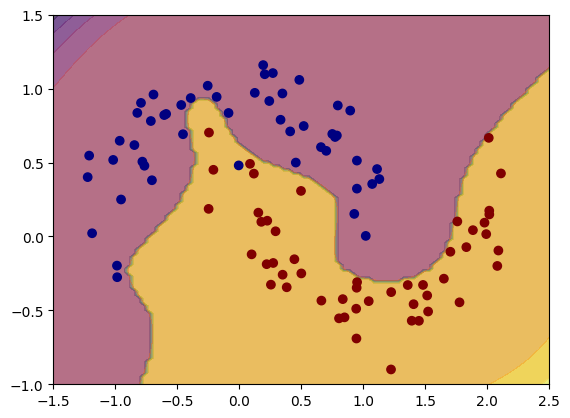

In [53]:
contour_plot(poly_kernle_svm_clf , [-1.5 , 2.5 , -1 , 1.5])
plot_points(x , y ,[-1.5 , 2.5 , -1 , 1.5] ) 

In [ ]:
#implementing the similarity thing using gaussian rbf kernel



formula is 

phi(x,l) = exp(-gamma multiplied by l2 norm of x , l)



<b>The C parameter controls the trade-off between maximizing the margin (making the "street" as wide as possible) and minimizing classifications errors.

In [ ]:
rbf_kernle = Pipeline([
    ("Standard Scaler" , StandardScaler()),
    ("rbf clf" , SVC(kernel="rbf" , gamma = 5 , C=1000))
    
])

rbf_kernle.fit(x,y)

,steps,"[('Standard Scaler', ...), ('rbf clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1000
,kernel,'rbf'
,degree,3
,gamma,5


,steps,"[('Standard Scaler', ...), ('rbf clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.001
,kernel,'rbf'
,degree,3
,gamma,5


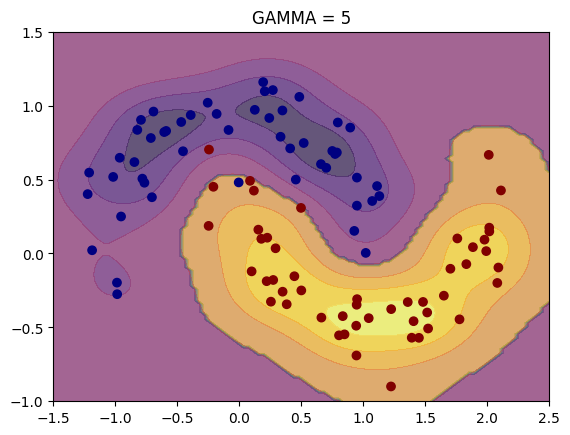

In [62]:
contour_plot(rbf_kernle , [-1.5 , 2.5 , -1 , 1.5])
plot_points(x , y ,[-1.5 , 2.5 , -1 , 1.5] ) 
plt.title("GAMMA = 5 , C=0.001")
plt.show()


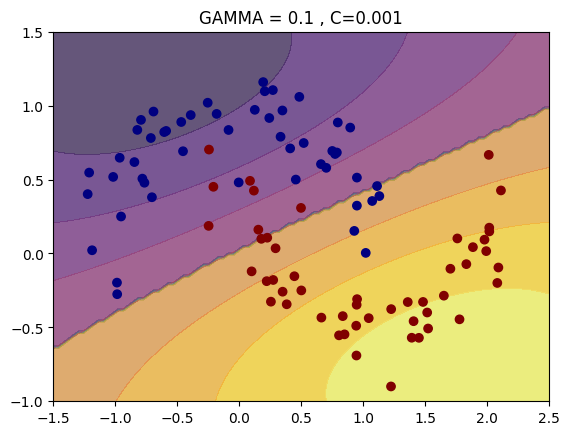

In [67]:
contour_plot(rbf_kernle , [-1.5 , 2.5 , -1 , 1.5])
plot_points(x , y ,[-1.5 , 2.5 , -1 , 1.5] ) 
plt.title("GAMMA = 0.1 , C=0.001")
plt.show()


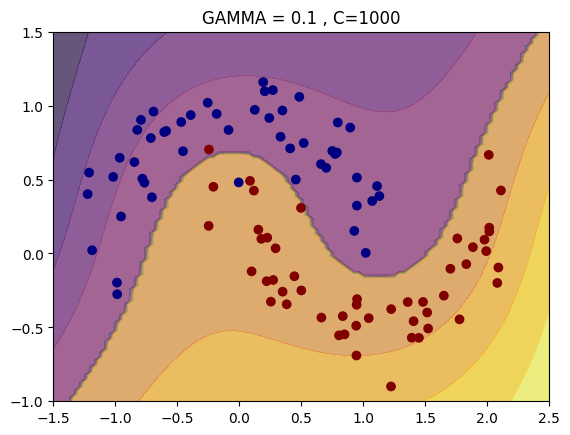

In [69]:
contour_plot(rbf_kernle , [-1.5 , 2.5 , -1 , 1.5])
plot_points(x , y ,[-1.5 , 2.5 , -1 , 1.5] ) 
plt.title("GAMMA = 0.1 , C=1000")
plt.show()

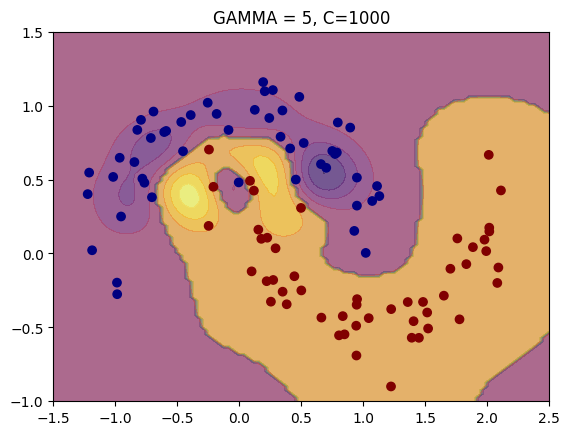

In [71]:
contour_plot(rbf_kernle , [-1.5 , 2.5 , -1 , 1.5])
plot_points(x , y ,[-1.5 , 2.5 , -1 , 1.5] ) 
plt.title("GAMMA = 5, C=1000")
plt.show()

In [72]:
#i wanna try what will happen if i dont do these stuff and use simple linear svm 

In [73]:
simple_svm = Pipeline([
    ("scaling" , StandardScaler()),
    ("simple linear svm" , LinearSVC())
])

simple_svm.fit(x , y)

,steps,"[('scaling', ...), ('simple linear svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


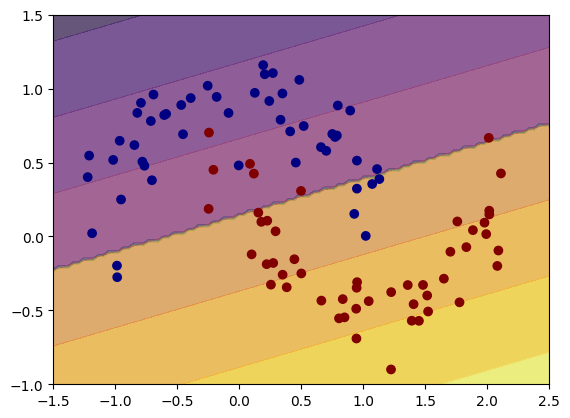

In [75]:
contour_plot(simple_svm , [-1.5 , 2.5 , -1 , 1.5])
plot_points(x , y ,[-1.5 , 2.5 , -1 , 1.5] ) 
plt.show()

In [77]:
#yeah the simple svm is failing 
#if i use the normal svm the default is rbf 



In [78]:
# regression using svm 

In [81]:
#data 

np.random.seed(42) #always random stuff whenever rerun
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [116]:
X.shape

(50, 1)

In [189]:
from sklearn.svm import LinearSVR

svm_reg = Pipeline([
    ("scaling" , StandardScaler()),
    ("svm reg linear" , LinearSVR(epsilon=1.5))
])

svm_reg.fit(X , y)

,steps,"[('scaling', ...), ('svm reg linear', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,epsilon,1.5
,tol,0.0001
,C,1.0
,loss,'epsilon_insensitive'


In [200]:
def off_margin_points(x , y , svr , epsilon):                   #takes data points x , y , the scaler vector regression model and the tuning parameter epsilon as input
    y_pred = svr.predict(x)                                        # predicts the value given by model on the data  x 
    off_margin = np.abs(y - y_pred) >= epsilon                      #generates  true false values based on the condition of the points
            
    return off_margin

In [208]:
def svm_plot_for_regresion(svr , epsilon):                                                      #takes the model and the tuning parameter as input 
    new_data_x =np.linspace(-1 , 1 , 30).reshape(-1 , 1)                                                                           # generates x random points 
    new_data_y = (0.2 + 0.1 * new_data_x + 0.5 * new_data_x**2).ravel()                               #generates y random points 
    
    off_margin_points_ = off_margin_points(new_data_x , new_data_y , svr , epsilon)                 #provides off margin points
    
    y_pred = svr.predict(new_data_x)                                                            #predictions on our data
    
    plt.scatter(new_data_x[~off_margin_points_] , new_data_y[~off_margin_points_] , c="g")            #plots the points which are in the region   
    plt.scatter(new_data_x[off_margin_points_] , new_data_y[off_margin_points_] , c="b")            #plots the points which are out of the region 
                                           
    plt.plot(new_data_x , y_pred , "r-")                                                        #plots the decision boundary
    
    plt.legend(['Points in the region' ,'Points out of the region' , 'Decision Boundary'] , loc="best")  
    
    #legend for the decisin boundary
    plt.plot(new_data_x, y_pred + epsilon , "k--")                                                 #plots the above epsilon line
    plt.plot(new_data_x , y_pred - epsilon , "k--")                                             #plots the below epsilon line

    
    
    
    

Text(0.5, 1.0, 'epsilon 0.5')

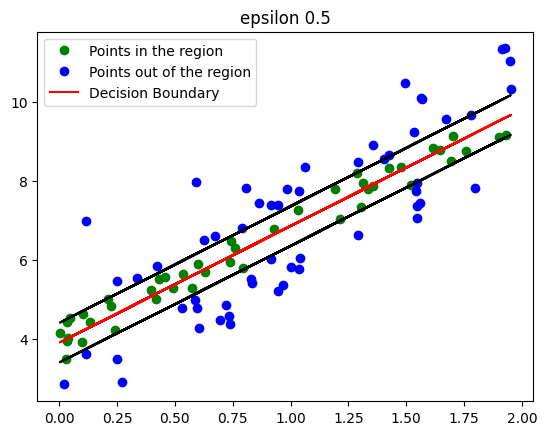

In [188]:
svm_plot_for_regresion(svm_reg , 0.5)
plt.title("epsilon 0.5")


Text(0.5, 1.0, 'epsilon 1.5')

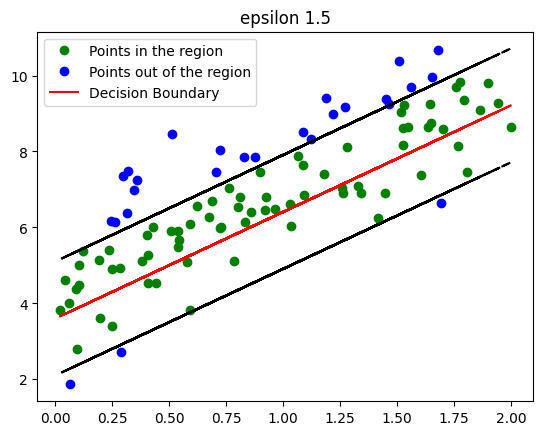

In [190]:
svm_plot_for_regresion(svm_reg , 1.5)
plt.title("epsilon 1.5")

,steps,"[('scaling', ...), ('kernelized svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0


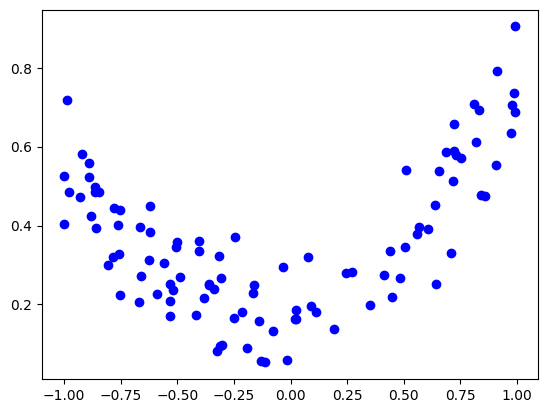

In [204]:
#kernelized svr

from sklearn.svm import SVR

svr_polynomial = Pipeline([
    ("scaling" , StandardScaler()),
    ("kernelized svr" , SVR(kernel="poly" , degree = 2 , C = 100 , epsilon = 0.1))
    
])

m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel() 
#generates y random points 


plt.plot(X , y , "bo")    
svr_polynomial.fit(X , y)

Text(0.5, 1.0, 'epsilon 0.1')

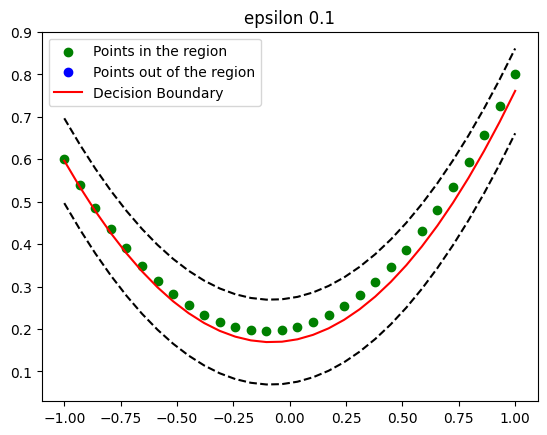

In [209]:
svm_plot_for_regresion(svr_polynomial , 0.1)
plt.title("epsilon 0.1")
